Residual Error: 17.90


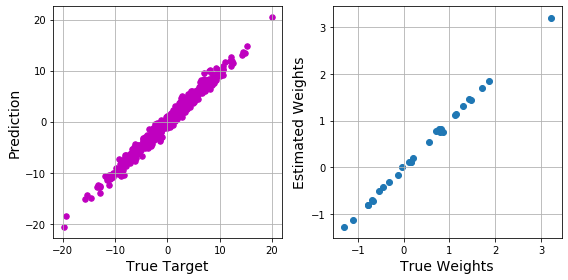

In [2]:
#Simple linear regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
# Estimate the weights by pseudo inverse
#
wEst = np.linalg.inv(X.T @ X) @ X.T @ yTarget
# Predict from the model
#
yEst = X @ wEst
# Scatter plot of predictions against truth
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(yTarget, yEst, c='m', s=30)
ax[0].grid(True)
ax[0].set_xlabel("True Target", fontsize=14)
ax[0].set_ylabel("Prediction", fontsize=14)
ax[1].scatter(wTrue, wEst)
ax[1].grid(True)
ax[1].set_xlabel("True Weights", fontsize=14)
ax[1].set_ylabel("Estimated Weights", fontsize=14)
plt.tight_layout()
# Error from the model
#
print("Residual Error: %3.2f" %(np.linalg.norm(yEst - yTarget)))

Residual Error (Initial) : 206.66
Residual Error (Converged): 17.59


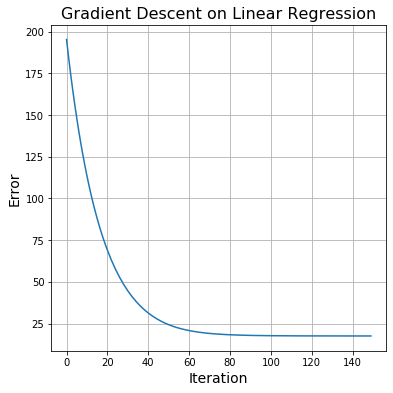

In [4]:
#Solving Linear Regression by Gradient Descent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Set up synthetic data
#
N, p = 500, 30
X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
# Initial guess and error
#
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)
# Parameters for gradient descent
#
MaxIter = 150
lRate = 0.0001
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
    wIter = wIter - lRate * X.T @ (X @ wIter - yTarget)
    Eplot[iter] = np.linalg.norm(X @ wIter - yTarget)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("Gradient Descent on Linear Regression",fontsize=16)
print("Residual Error (Initial) : %3.2f" %(E0))
print("Residual Error (Converged): %3.2f"
%(np.linalg.norm(X @ wIter - yTarget)))
plt.savefig("GDLearningCurve.png")

163.77080065017523
18.21375464417169


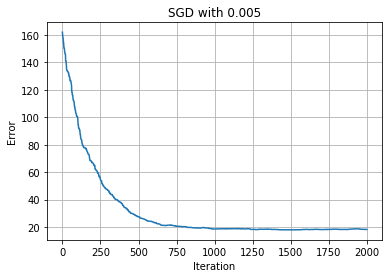

In [72]:
#Stochastic Gradient Descent on Linear Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

#initialized w
w0 = np.random.randn(p,1)
#error
E0 = np.linalg.norm(yTarget - X @ w0)
print(E0)
MaxIter = 2000
lRate = 0.005
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = X[j,:]
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
print(np.linalg.norm(yTarget - X @ wIter))
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("SGD with 0.005")
plt.savefig("C:\\Users\\zhoujie\\Desktop\\SGD 0.005 lr.png")

Residual Error (Initial) : 125.29
Residual Error (Converged): 17.37


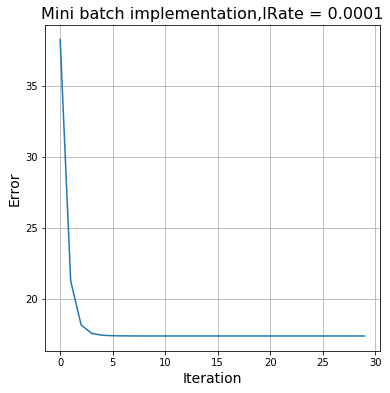

In [110]:
#Mni batch Gradient Descent on Linear Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Set up synthetic data
#
N, p = 500, 30
X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

#Initial guess and error

w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)
# Parameters for gradient descent
#
MaxIter = 30
lRate = 0.0001
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
    for mb in range(50):
        wIter = wIter - lRate * X[:10*(mb+1),:].T @ (X[:10*(mb+1),:] @ wIter - yTarget[:10*(mb+1)])
    Eplot[iter] = np.linalg.norm(X @ wIter - yTarget)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("Mini batch implementation,lRate = 0.0001",fontsize=16)
print("Residual Error (Initial) : %3.2f" %(E0))
print("Residual Error (Converged): %3.2f"
%(np.linalg.norm(X @ wIter - yTarget)))
plt.savefig("C:\\Users\\zhoujie\\Desktop\\Mini batch implementation.png")    

253.26425263930548
17.31367233490803


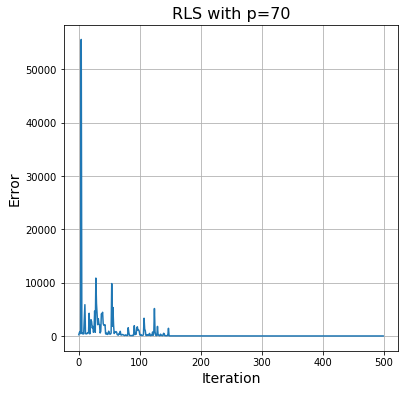

In [120]:
#RLS
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set up synthetic data
N, p = 500, 70
X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

#Initial guess and error

w = np.random.randn(p,1)

MaxIter = 500
Eplot = np.zeros((MaxIter, 1))

x=np.array([X[0,:]]).T  #column vector
y=yTarget[0,:]

R=x @ x.T #p×p
#Z=x * y #p×1
P=np.linalg.inv(R) #p×p
# w=P @ Z #p×1

print(np.linalg.norm(X @ w - yTarget))  
Eplot[0] =np.linalg.norm(X @ w - yTarget)
for i in range(1,X.shape[0]):
    x=np.array([X[i,:]]).T
    y=yTarget[i,:]
    
    k=(P @ x)/(1+x.T @ P @ x) #p×1
    P=P-k @ x.T @ P
    w=w-k * (x.T @ w-y) #p×1
    Eplot[i] =np.linalg.norm(X @ w - yTarget) 
print(np.linalg.norm(X @ w - yTarget))    

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("RLS with p=70",fontsize=16)
plt.savefig("C:\\Users\\zhoujie\\Desktop\\RLS with p=70.png")

In [73]:
#By using UCI data(https://archive.ics.uci.edu/ml/index.php)
import pandas as pd
df= pd.read_csv("C:\\winequality-red.csv",index_col=False)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
df=df.to_numpy()
X=df[:,:11]
yTarget=df[:,11]
print(X)
print(yTarget)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5. 5. 5. ... 6. 5. 6.]


56048.54724118055
1934.0191460718577


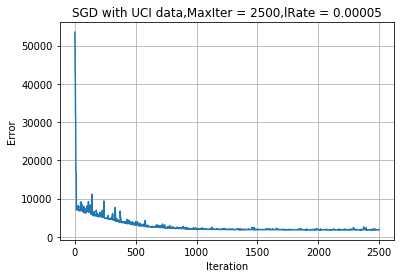

In [76]:
#Implemented with SGD
#initialized w
w0 = np.random.randn(11,1)
#error
E0 = np.linalg.norm(yTarget - X @ w0)
print(E0)
MaxIter = 2500
lRate = 0.00005
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = X[j,:]
    xj = np.array([X[j,:]]).T
    yj = yTarget[j]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
print(np.linalg.norm(yTarget - X @ wIter))
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("SGD with UCI data,MaxIter = 2500,lRate = 0.00005")
plt.savefig("C:\\Users\\zhoujie\\Desktop\\SGD with UCI data.png")

251.63600435223162
17.314482494423576


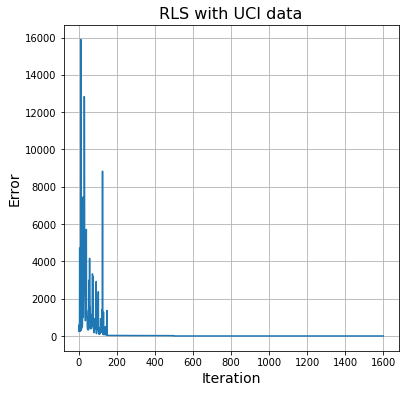

In [121]:
#Implemented with RLS
#Initial guess and error

w = np.random.randn(p,1)

MaxIter = 1600
Eplot = np.zeros((MaxIter, 1))

x=np.array([X[0,:]]).T  #column vector
y=yTarget[0,:]

R=x @ x.T #p×p
#Z=x * y #p×1
P=np.linalg.inv(R) #p×p
# w=P @ Z #p×1

print(np.linalg.norm(X @ w - yTarget))  
Eplot[0] =np.linalg.norm(X @ w - yTarget)
for i in range(1,X.shape[0]):
    x=np.array([X[i,:]]).T
    y=yTarget[i,:]
    
    k=(P @ x)/(1+x.T @ P @ x) #p×1
    P=P-k @ x.T @ P
    w=w-k * (x.T @ w-y) #p×1
    Eplot[i] =np.linalg.norm(X @ w - yTarget) 
print(np.linalg.norm(X @ w - yTarget))    

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("RLS with UCI data",fontsize=16)
plt.savefig("C:\\Users\\zhoujie\\Desktop\\RLS with UCI data.png")